# 3.0 Antitoxin System Experiment

## Activate project

In [1]:
using DrWatson
@quickactivate :CellFilamentation

import Random

┌ Info: Precompiling CellFilamentation [e4b032d7-6aa3-5796-9acb-e25c24e1fb7d]
└ @ Base loading.jl:1317


## Differential equation algorithms

In [2]:
choice_function(integrator) = (Int(integrator.dt < 0.001) + 1)
alg_switch = CompositeAlgorithm((Tsit5(), Vern7()), choice_function);

## Initialize an Cell structure

In [3]:
cell = Cell(
    side_length=0.8,
    radius=0.2,
    max_height=4.0,
    filamentation_rate=0.1,
    antitoxin=25.0,
    antitoxin_efficacy = 0.1,
    filamentation_threshold = 0.5,
    kill_threshold = 1.0,
    toxin_diffusion_rate = 0.1,
)

Cell{Float64}
  side_length: Float64 0.8
  radius: Float64 0.2
  internal_toxin: Float64 0.0
  toxin_diffusion_rate: Float64 0.1
  antitoxin: Float64 25.0
  antitoxin_efficacy: Float64 0.1
  filamentation_rate: Float64 0.1
  filamentation_threshold: Float64 0.5
  kill_threshold: Float64 1.0
  max_height: Float64 4.0
  noise_int_toxin: Float64 0.1
  noise_height: Float64 0.0
  τ_filamentation: Float64 Inf
  τ_kill: Float64 Inf
  τ_delay: Float64 0.0
  state: Symbol Normal


## Simulate filamentation

### Exposure time to toxin

In [4]:
t, toxin = toxin_entry(20, 300, 1000, 130, false);

### Plot filamentation

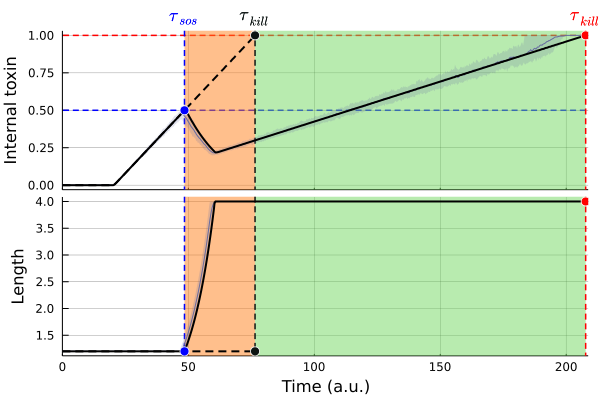

In [5]:
Random.seed!(1234)
_, this_cell = simulate(cell, t, toxin)
antitoxin_model_plot = simulation_plot(cell, t, toxin, 100)

In [6]:
savefig(antitoxin_model_plot, plotsdir("filamentation_antitoxin_model_ramp_signal.png"))
savefig(antitoxin_model_plot, plotsdir("filamentation_antitoxin_model_ramp_signal.svg"))

## Evaluate effect of antitoxin system

### Antitoxin distribution

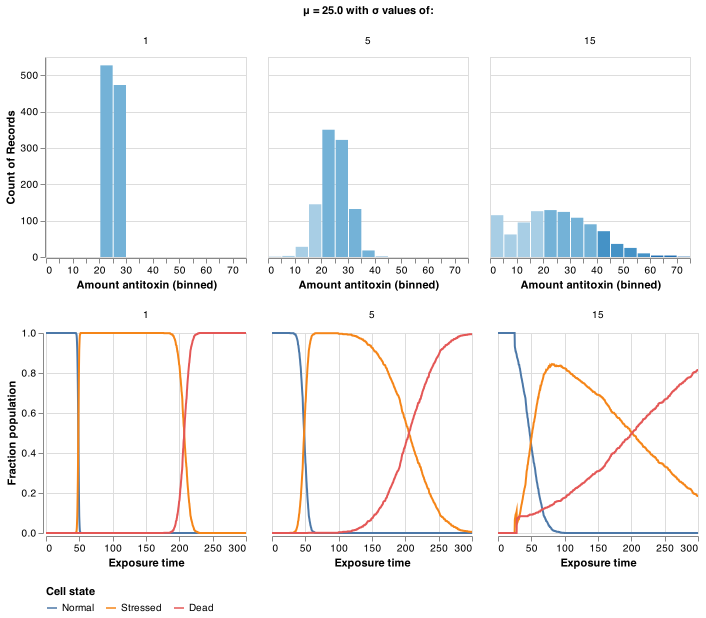

In [7]:
df, antitoxin_df = antitoxin_experiment(cell, t, toxin; n_cells=1000, σs = [1.0, 5.0, 15.0], seed=42, alg=alg_switch);
antitoxin_plot = plot_antitoxin_experiment(df, antitoxin_df; maxbins=25)

In [8]:
save(plotsdir("antitoxin_plot_histogram_line_μ=25-σ=1_5_15.png"), antitoxin_plot)
save(plotsdir("antitoxin_plot_histogram_line_μ=25-σ=1_5_15.svg"), antitoxin_plot)

### Survival probability

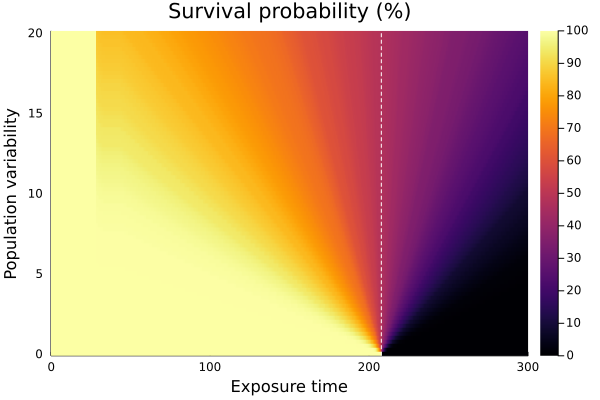

In [9]:
heatmap_file = datadir("exp_raw", "antitoxin_experiment.csv")

if isfile(heatmap_file)
    heatmap_df = CSV.read(heatmap_file, DataFrame)
else
    heatmap_df = antitoxin_experiment(cell, t, toxin; n_cells=1000, σs = collect(0:0.25:20), seed=42, alg = alg_switch)[1]
    CSV.write(heatmap_file, heatmap_df)
end

heatmap_p = plot_antitoxin_experiment(heatmap_df, true)
vline!(heatmap_p, [this_cell.τ_kill], c=:white, ls=:dash, leg=false)

In [10]:
savefig(heatmap_p, plotsdir("heatmap_survival_probability_mu=25.0_sigma=0-0.25-20_seed=42_alg=Vern7.png"))